In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

Questions:
1. Delete unnamed columns
2. Show the distribution of male and female
3. Show the top 5 most preferred names
4. What is the median name occurence in the dataset
5. Distribution of male and female born count by states

In [8]:
df.shape

(1016395, 6)

In [4]:
# 1.Delete unmaned columns
df = df.drop('Unnamed: 0',axis=1)

In [13]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [24]:
df.Gender.value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

<BarContainer object of 2 artists>

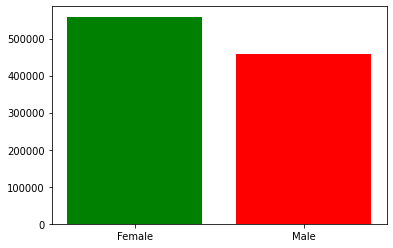

In [33]:
# sns.distplot(df.Gender)
df.Gender.value_counts()[0]
import matplotlib.pyplot as plt
plt.bar(['Female','Male'],[df.Gender.value_counts()[0],df.Gender.value_counts()[1]],color =['g','r'])


We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below

1. fitting it to the periodic function

2. plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and max temperature')

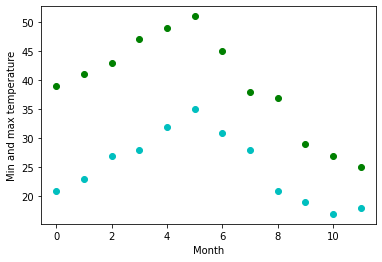

In [34]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [35]:
from scipy import optimize
def per_func(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(per_func, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(per_func, months,
                                      temp_min, [-40, 20, 0])

<ipython-input-40-540bd20de4f4>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(days, per_func(days, *res_max), 'm-',color='red')
<ipython-input-40-540bd20de4f4>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y-" (-> color='y'). The keyword argument will take precedence.
  plt.plot(days, per_func(days, *res_min), 'y-',color='blue')


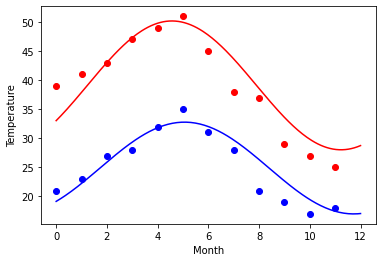

In [40]:
days = np.linspace(0, 12, num=200)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, per_func(days, *res_max), 'm-',color='red')
plt.plot(months, temp_min, 'bo')
plt.plot(days, per_func(days, *res_min), 'y-',color='blue')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()